In [ ]:
# diabetes project

In [1]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

In [2]:
import numpy as np

X = np.array(df_X)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [3]:
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [5]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [6]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [7]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
    
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [8]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [9]:
LEARNING_RATE = 0.01

In [10]:
%%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10000 : Loss 3443.6597
Iteration 20000 : Loss 3094.2062
Iteration 30000 : Loss 2979.0913
Iteration 40000 : Loss 2933.7727
Iteration 50000 : Loss 2914.7162
Iteration 60000 : Loss 2906.1845
Iteration 70000 : Loss 2902.0908
Iteration 80000 : Loss 2899.9674
Iteration 90000 : Loss 2898.7650
Iteration 100000 : Loss 2898.0145
9.41 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [11]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2880.2656796092647)

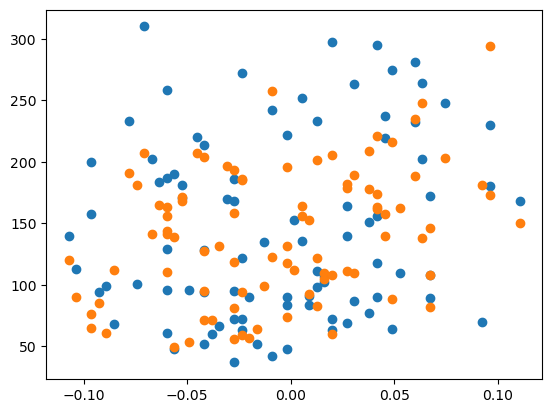

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [ ]:
# bike-sharing-demand project

In [1]:
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv") 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [2]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['weekday'] = train['datetime'].dt.day_name() # weekday 추가
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  weekday     10886 non-null  object        
 13  year        10886 non-null  int32         
 14  month       10886 non-null  int32         
 15  day         10886 non-null  int32         
 16  hour        10886 non-

In [3]:
day_to_number = {
    'Monday': '1',
    'Tuesday': '2',
    'Wednesday': '3',
    'Thursday': '4',
    'Friday': '5',
    'Saturday': '6',
    'Sunday': '0'
}
train['weekday'] = train['weekday'].map(day_to_number)
ordered_cats = ['5', '1', '6', '0', '4', '2', '3']
train['weekday'] = pd.Categorical(train['weekday'], categories=ordered_cats, ordered=True)

In [4]:
print(train)

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count weekday  year  \
0      14.395        81     0.00

In [5]:
# month 에서 seanson 을 다시 추출
def badToRight(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3

In [6]:
# season feature 를 업데이트
train['season'] = train.month.apply(badToRight)

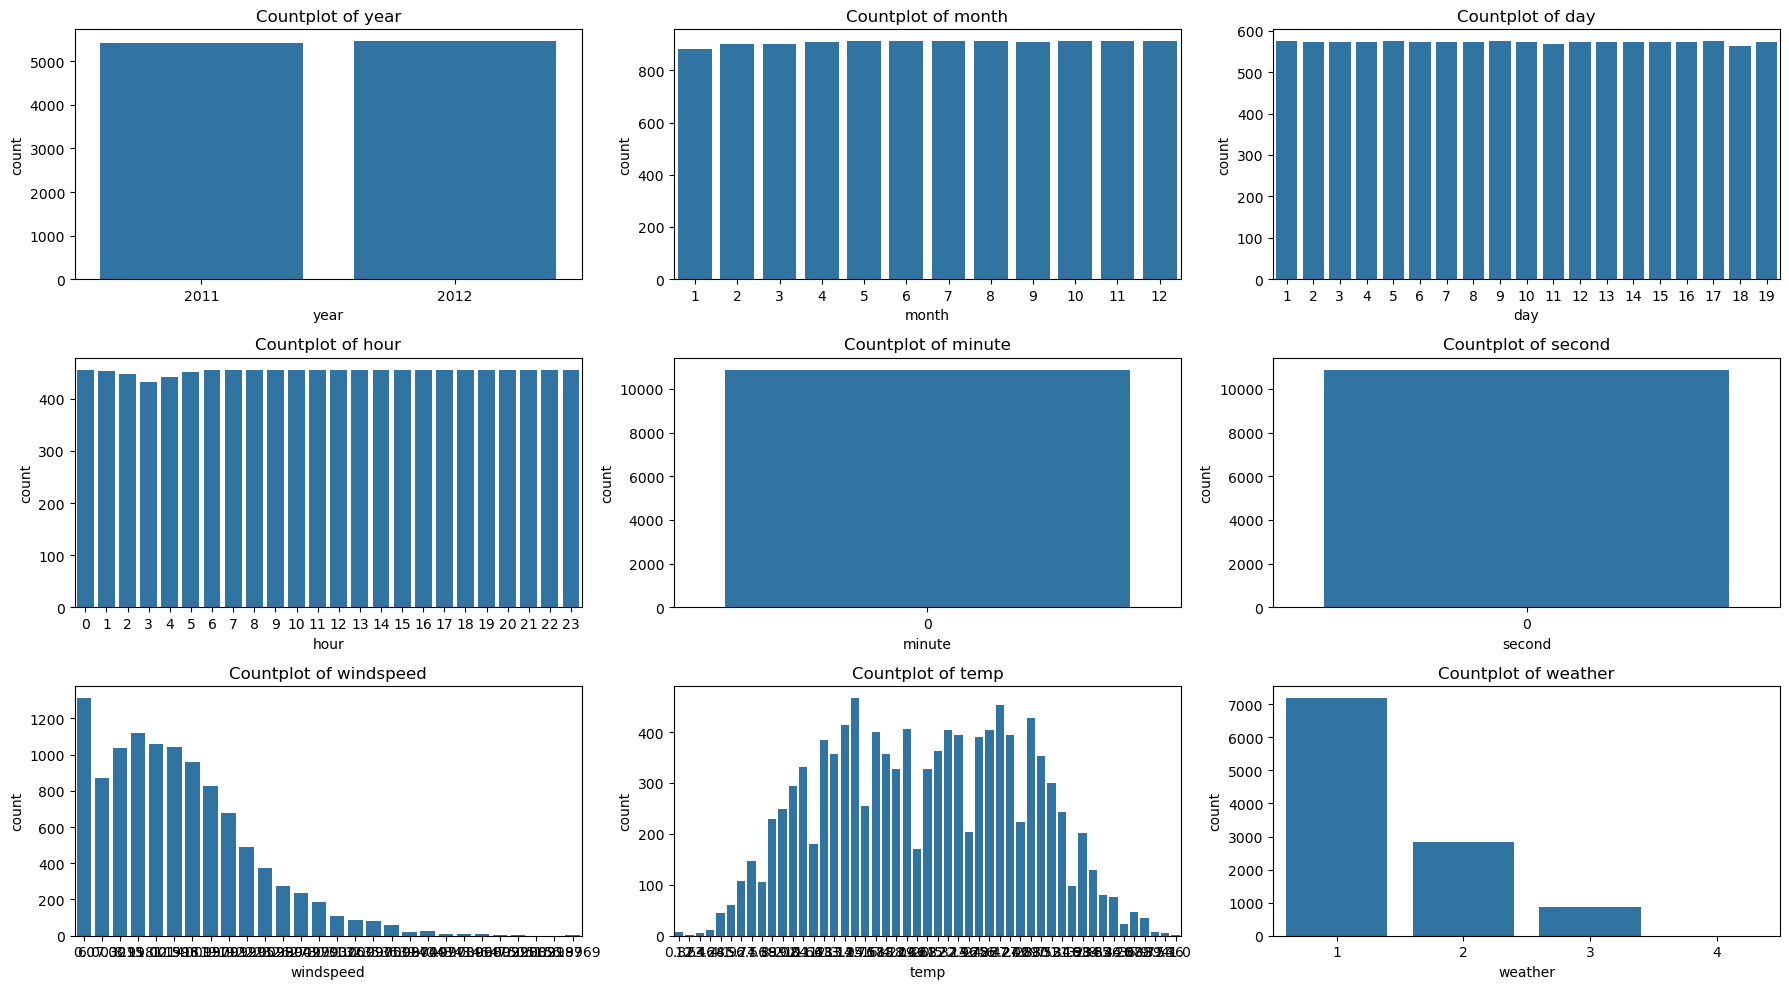

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 feature 별로 학습 데이터 개수가 고르게 있는지 시각화

fig, axs = plt.subplots(3, 3, figsize=(18, 10))
cols = ['year', 'month', 'day', 'hour', 'minute', 'second', 'windspeed', 'temp', 'weather']
for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

In [8]:
# weather 값이 4인 데이터가 하나뿐
print(train[train['weather']==4])

                datetime  season  holiday  workingday  weather  temp   atemp  \
5631 2012-01-09 18:00:00       4        0           1        4   8.2  11.365   

      humidity  windspeed  casual  registered  count weekday  year  month  \
5631        86     6.0032       6         158    164       1  2012      1   

      day  hour  minute  second  
5631    9    18       0       0  


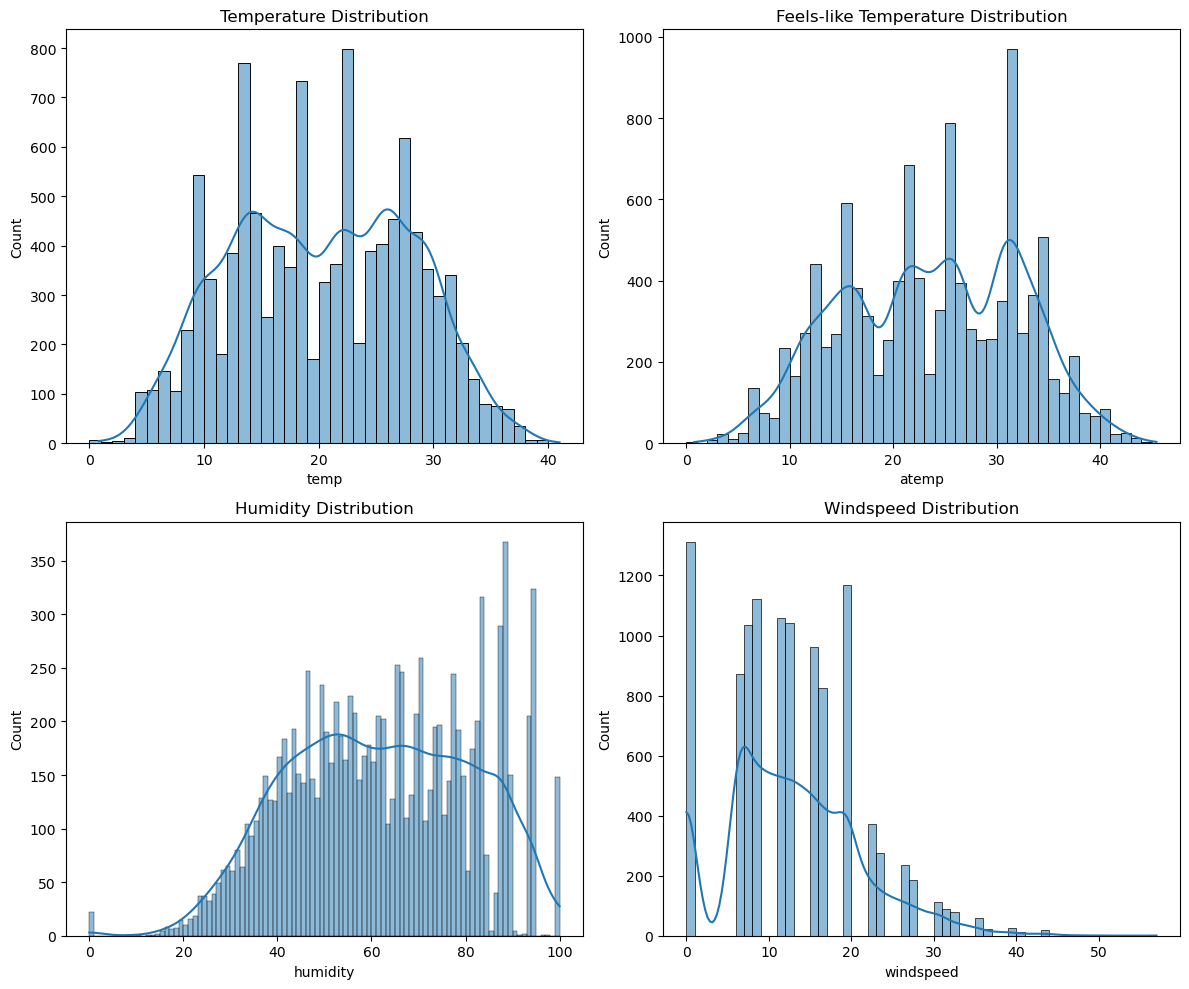

In [9]:
fig = plt.figure(figsize=[12,10])

# 1. 기온 분포
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.histplot(train.temp, bins=range(int(train.temp.min()), int(train.temp.max()) + 1), kde=True)
ax1.set_title("Temperature Distribution")

# 2. 체감온도 분포
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.histplot(train.atemp, bins=range(int(train.atemp.min()), int(train.atemp.max()) + 1), kde=True)
ax2.set_title("Feels-like Temperature Distribution")

# 3. 습도 분포
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.histplot(train.humidity, bins=range(int(train.humidity.min()), int(train.humidity.max()) + 1), kde=True)
ax3.set_title("Humidity Distribution")

# 4. 바람 속도 분포
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.histplot(train.windspeed, bins=range(int(train.windspeed.min()), int(train.windspeed.max()) + 1), kde=True)
ax4.set_title("Windspeed Distribution")

plt.tight_layout()
plt.show()


In [10]:
# windspeed 값이 0인 경우 전처리
dataWind0 = train[train['windspeed'] == 0].copy()
dataWindNot0 = train[train['windspeed']!=0]

In [11]:
dataWind0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'weekday', 'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [12]:
# 모델 학습용 데이터
features_to_drop = ['windspeed', 'casual', 'registered', 'count', 'datetime', 'minute', 'second']
dataWind0_df = dataWind0.drop(features_to_drop,axis=1)
dataWindNot0_df = dataWindNot0.drop(features_to_drop,axis=1)

# 예측 대상
target_series = dataWindNot0['windspeed']

In [13]:
# 외부 모델을 사용하여 windspeed 가 null 인 부분을 값으로 채워넣음
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor()
rf2.fit(dataWindNot0_df,target_series)
predicted = rf2.predict(dataWind0_df)
print(predicted)

[ 7.781849  7.852065  7.842149 ... 10.091004 12.389573 11.691835]


In [14]:
dataWind0['windspeed'] = predicted
train = pd.concat([dataWind0,dataWindNot0],axis=0)
train = train.sort_index()

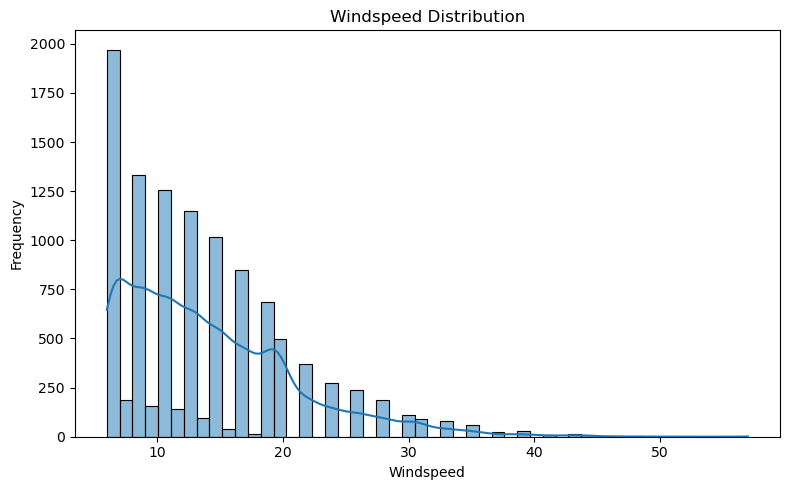

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(train['windspeed'], bins=50, kde=True)
plt.title("Windspeed Distribution")
plt.xlabel("Windspeed")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [16]:
print(train.head(10))

             datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-01 00:00:00       4        0           0        1   9.84  14.395   
1 2011-01-01 01:00:00       4        0           0        1   9.02  13.635   
2 2011-01-01 02:00:00       4        0           0        1   9.02  13.635   
3 2011-01-01 03:00:00       4        0           0        1   9.84  14.395   
4 2011-01-01 04:00:00       4        0           0        1   9.84  14.395   
5 2011-01-01 05:00:00       4        0           0        2   9.84  12.880   
6 2011-01-01 06:00:00       4        0           0        1   9.02  13.635   
7 2011-01-01 07:00:00       4        0           0        1   8.20  12.880   
8 2011-01-01 08:00:00       4        0           0        1   9.84  14.395   
9 2011-01-01 09:00:00       4        0           0        1  13.12  17.425   

   humidity  windspeed  casual  registered  count weekday  year  month  day  \
0        81   7.781849       3          13     16       6  201

In [17]:
# 범주형 데이터 원-핫 인코딩 처리 함수
def one_hot_encode_columns(df, categorical_cols, drop_first=True):
    """
    특정 컬럼들만 원-핫 인코딩하여 변환된 DataFrame을 반환합니다.
    
    Parameters:
    - df: 입력 DataFrame
    - categorical_cols: 원-핫 인코딩할 컬럼 이름 리스트
    - drop_first: 첫 카테고리 삭제 여부 (기본값: True)

    Returns:
    - 인코딩된 새로운 DataFrame
    """
    # 1. 입력 컬럼들을 category 타입으로 변환 (숫자여도 처리 가능하게)
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].astype('category')

    # 2. 원-핫 인코딩 수행
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=drop_first)

    return df_encoded

In [18]:
# 1. 타겟 저장
y = train['count']

# 2. 제거할 열 목록
drop_cols = ['datetime', 'casual', 'registered', 'count', 'minute', 'second']
X = train.drop(columns=drop_cols)

# 3. 문자형 weekday가 있으면 정수형으로 변환
if X['weekday'].dtype.name == 'category' or X['weekday'].dtype == object:
    X['weekday'] = X['weekday'].astype(int)

# 4. 범주형 컬럼 지정 후, 함수로 원-핫 인코딩 적용
categorical_cols = ['season', 'weather', 'holiday', 'workingday', 'weekday', 'year', 'month', 'day', 'hour']
X = one_hot_encode_columns(X, categorical_cols, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 10000.289085289722
RMSE: 100.00144541600247


In [21]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))

R²: 0.6970246154874744


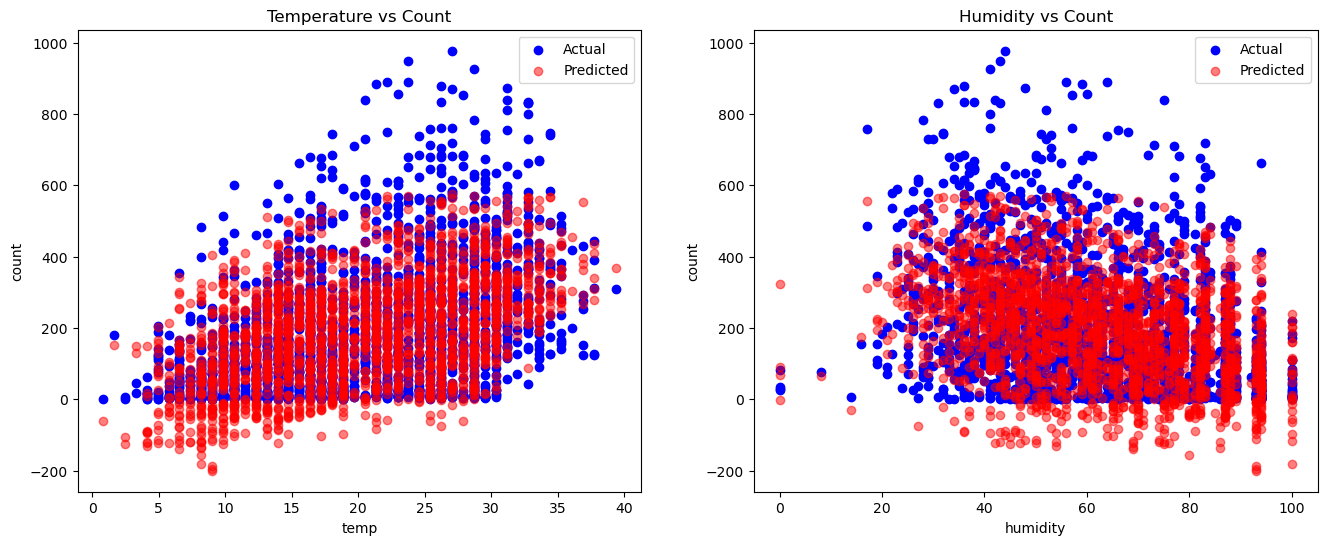

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()